# Schůze

<b>Jmenné konvence:</b>
* tabulky a sloupce tabulek česky dle konvence v zdrojových datech
* proměnné, které se semanticky vztahují k dění v poslanecké sněmovně, česky bez diakritiky nebo anglicky
* ostatní proměnné anglicky
* komentáře a vysvětlení česky s diakritikou
* funkce anglicky

# Parametry

In [173]:
volebni_obdobi = '2017'
data_dir = './data/'

# Instalace závislostí

In [174]:
!pip install jupyter-dash -q

You should consider upgrading via the '/home/borjana/.venv/finance/bin/python3.7 -m pip install --upgrade pip' command.


In [175]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Importy

In [176]:
from setup_logger import log

In [460]:
from datetime import timedelta, datetime

import pandas as pd
import numpy as np

import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff

import dash
from jupyter_dash import JupyterDash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output

In [462]:
import utility
from Schuze import *
from Stenozaznamy import *
from Stenotexty import *

In [447]:
s = StenoText(volebni_obdobi=2017, stahni=True)

--> Organy
--> Osoby
./schuze.zip
Checking for: ['./bod_stav.unl']
Missing files: []
Tabulka bod_stav:
Přetypovávám sloupec: 'id_bod_stav'.
Přetypovávám sloupec: 'popis'.
Checking for: ['./bod_stav.unl', './bod_schuze.unl']
Missing files: []
Tabulka bod_schuze:
Přetypovávám sloupec: 'id_bod'.
Přetypovávám sloupec: 'id_schuze'.
Přetypovávám sloupec: 'id_tisk'.
Přetypovávám sloupec: 'id_typ'.
Přetypovávám sloupec: 'bod'.
Přetypovávám sloupec: 'uplny_naz'.
Přetypovávám sloupec: 'uplny_kon'.
Přetypovávám sloupec: 'poznamka'.
Přetypovávám sloupec: 'id_bod_stav'.
Přetypovávám sloupec: 'pozvanka'.
Přetypovávám sloupec: 'rj'.
Přetypovávám sloupec: 'pozn2'.
Přetypovávám sloupec: 'druh_bodu'.
Přetypovávám sloupec: 'id_sd'.
Přetypovávám sloupec: 'zkratka'.
Dropping [] because of big inconsistencies.
Dropping [] because of abundance.
./poslanci.zip
Checking for: ['./bod_stav.unl', './bod_schuze.unl', './osoby.unl', './osoba_extra.unl']
Missing files: []
Tabulka osoby:
Přetypovávám sloupec: 'id_oso

INFO:Poslanecká sněmovna:K stažení: 9528 souborů.


....................................................................................................

INFO:Poslanecká sněmovna:K zpracování: 9528 souborů.


****************************************************************************************************Tabulka steno_texty [stage1]:
Přetypovávám sloupec: 'text'.
Přetypovávám sloupec: 'text_s_poznamkami'.
Přetypovávám sloupec: 'schuze'.
Přetypovávám sloupec: 'turn'.
Přetypovávám sloupec: 'id_osoba'.
Přetypovávám sloupec: 'id_rec'.
Přetypovávám sloupec: 'poznamka'.
Přetypovávám sloupec: 'je_poznamka'.
Přetypovávám sloupec: 'cas'.
Přetypovávám sloupec: 'typ_casu'.
Přetypovávám sloupec: 'date'.
Tabulka steno_rec:
Přetypovávám sloupec: 'text'.
Přetypovávám sloupec: 'text_s_poznamkami'.
Přetypovávám sloupec: 'schuze'.
Přetypovávám sloupec: 'turn'.
Přetypovávám sloupec: 'id_osoba'.
Přetypovávám sloupec: 'id_rec'.
Přetypovávám sloupec: 'poznamka'.
Přetypovávám sloupec: 'je_poznamka'.
Přetypovávám sloupec: 'cas'.
Přetypovávám sloupec: 'typ_casu'.
Přetypovávám sloupec: 'date'.
Dropping [] because of big inconsistencies.
Dropping [] because of abundance.


In [570]:
s.df.head(20)

,Unnamed: 0,text,text_s_poznamkami,schuze,turn,id_rec,poznamka,je_poznamka,cas,typ_casu,date,id_osoba,od_steno_DT
0,0,<NA>,(Schůze zahájena ve 13.00 hodin.),1,1,<NA>,['Schůze zahájena ve 13.00 hodin.'],True,13:00,zahájení,2017-11-20,<NA>,2017-11-20 00:00:00+01:00
1,1,"Vážené paní poslankyně, vážení páni poslanci, ...","Vážené paní poslankyně, vážení páni poslanci, ...",1,1,1,NaN,False,<NA>,<NA>,2017-11-20,5462,2017-11-20 00:00:00+01:00
2,2,"Prosím, abychom všichni povstali. Naše jednání...","Prosím, abychom všichni povstali. Naše jednání...",1,1,1,['Děje se. Zazněla státní hymna České republik...,False,<NA>,<NA>,2017-11-20,5462,2017-11-20 00:00:00+01:00
3,3,"Vážené paní poslankyně, vážení páni poslanci, ...","Vážené paní poslankyně, vážení páni poslanci, ...",1,1,1,NaN,False,<NA>,<NA>,2017-11-20,5462,2017-11-20 00:00:00+01:00
4,4,Pořad ustavující schůze je dán příslušnými ust...,Pořad ustavující schůze je dán příslušnými ust...,1,1,1,NaN,False,<NA>,<NA>,2017-11-20,5462,2017-11-20 00:00:00+01:00
5,5,Chtěl bych vás seznámit s omluvami. Omlouvá se...,Chtěl bych vás seznámit s omluvami. Omlouvá se...,1,1,1,NaN,False,<NA>,<NA>,2017-11-20,5462,2017-11-20 00:00:00+01:00
6,6,Pokud někdo z vás žádal o vydání náhradní kart...,Pokud někdo z vás žádal o vydání náhradní kart...,1,1,1,NaN,False,<NA>,<NA>,2017-11-20,5462,2017-11-20 00:00:00+01:00
7,7,Nyní přistoupíme k prvnímu bodu naší ustavujíc...,Nyní přistoupíme k prvnímu bodu naší ustavujíc...,1,1,1,NaN,False,<NA>,<NA>,2017-11-20,5462,2017-11-20 00:00:00+01:00
8,8,"Já vás prosím, abyste povstali.","Já vás prosím, abyste povstali. (Děje se.)",1,1,1,['Děje se.'],False,<NA>,<NA>,2017-11-20,5462,2017-11-20 00:00:00+01:00
9,9,"""Slibuji věrnost České republice. Slibuji, že ...","""Slibuji věrnost České republice. Slibuji, že ...",1,1,1,NaN,False,<NA>,<NA>,2017-11-20,5462,2017-11-20 00:00:00+01:00


In [573]:
s.df.columns

Index(['Unnamed: 0', 'text', 'text_s_poznamkami', 'schuze', 'turn', 'id_rec',
       'poznamka', 'je_poznamka', 'cas', 'typ_casu', 'date', 'id_osoba',
       'od_steno_DT'],
      dtype='object')

In [449]:
s.steno.head()

,id_steno,id_org,schuze,turn,od_steno,jd,od_t,do_t,od_steno_DT
49626,115470,172,1,1,2017-11-20,1,780,790,2017-11-20 00:00:00+01:00
49627,115471,172,1,2,2017-11-20,1,790,800,2017-11-20 00:00:00+01:00
49628,115472,172,1,3,2017-11-20,1,800,810,2017-11-20 00:00:00+01:00
49629,115473,172,1,4,2017-11-20,1,810,820,2017-11-20 00:00:00+01:00
49630,115474,172,1,5,2017-11-20,1,820,830,2017-11-20 00:00:00+01:00


In [450]:
s.steno_rec.head()

,id_steno,id_osoba,aname,id_bod,druh,druh_CAT,id_org,schuze,turn,od_steno,...,do_t,od_steno_DT,pred,prijmeni,jmeno,za,narozeni,pohlavi,zmena,umrti
0,115470,303,2,34928,5,řečník,172,1,1,2017-11-20,...,790,2017-11-20 00:00:00+01:00,JUDr.,Filip,Vojtěch,,1955-01-13,M,1998-07-12,NaT
1,115470,5462,1,<NA>,4,předsedající,172,1,1,2017-11-20,...,790,2017-11-20 00:00:00+01:00,,Hamáček,Jan,,1978-04-11,M,NaT,NaT
2,115474,5462,1,34928,4,předsedající,172,1,5,2017-11-20,...,830,2017-11-20 00:00:00+01:00,,Hamáček,Jan,,1978-04-11,M,NaT,NaT
3,115474,6211,2,34929,5,řečník,172,1,5,2017-11-20,...,830,2017-11-20 00:00:00+01:00,Ing.,Kolovratník,Martin,,1975-11-04,M,NaT,NaT
4,115475,309,2,34930,5,řečník,172,1,6,2017-11-20,...,840,2017-11-20 00:00:00+01:00,Ing.,Kováčik,Pavel,,1955-02-07,M,1998-07-12,NaT


In [747]:
x=s.df.copy()
x[(x.schuze == 1) & (x.turn == 6) & (x.id_rec == 6)]

,Unnamed: 0,text,text_s_poznamkami,schuze,turn,id_rec,poznamka,je_poznamka,cas,typ_casu,date,id_osoba,od_steno_DT
247,247,Ministr vlády ČR Jan Chvojka Děkuji za slovo. ...,Ministr vlády ČR Jan Chvojka Děkuji za slovo. ...,1,6,6,NaN,False,<NA>,<NA>,2017-11-20,5926,2017-11-20 00:00:00+01:00


In [751]:
# doplneni recniku, kteri mluvi pres hranici 'turn'
def dopln_nahradu(item, source, col):
    candidates = source[source.schuze.eq(item['schuze']) & (source.turn < item['turn']) & (~source.id_rec.isna())]
    return candidates[col].iloc[-1] if len(candidates) > 0 else None

x.loc[x.id_rec.isna(), 'id_rec_surrogate'] = x[x.id_rec.isna()].apply(lambda item: dopln_nahradu(item, x, 'id_rec'), axis=1)
x.loc[~x.id_rec.isna(), 'id_rec_surrogate'] = x[~x.id_rec.isna()].id_rec
x.id_rec_surrogate = x.id_rec_surrogate.astype('Int64')

x.loc[x.id_rec.isna(), 'turn_surrogate'] = x[x.id_rec.isna()].apply(lambda item: dopln_nahradu(item, x, 'turn'), axis=1)
x.loc[~x.id_rec.isna(), 'turn_surrogate'] = x[~x.id_rec.isna()].turn
x.turn_surrogate = x.turn_surrogate.astype('Int64')

In [753]:
x[x.id_rec.isna()][['id_rec', 'turn', 'id_rec_surrogate', 'turn_surrogate', 'id_osoba']].iloc[0:80]

,id_rec,turn,id_rec_surrogate,turn_surrogate,id_osoba
0,<NA>,1,<NA>,<NA>,<NA>
41,<NA>,2,2,1,<NA>
42,<NA>,2,2,1,<NA>
43,<NA>,2,2,1,<NA>
44,<NA>,2,2,1,<NA>
...,...,...,...,...,...
115,<NA>,3,2,1,<NA>
116,<NA>,3,2,1,<NA>
117,<NA>,3,2,1,<NA>
118,<NA>,3,2,1,<NA>


In [758]:
# připoj id_osoba
m = pd.merge(left=x, right=s.steno_rec[['schuze', "turn", "aname", 'id_osoba']], left_on=["schuze", "turn_surrogate", "id_rec_surrogate"], right_on=["schuze", "turn", "aname"], how="left")
ids = m[m.id_osoba_x.eq(m.id_osoba_y)].index
ne_ids = set(m.index)-set(ids)
assert m[m.index.isin(ne_ids) & (~m.id_osoba_x.isna())].size / m[m.index.isin(ne_ids)].size < 0.1 # This is a consistency sanity check
m['id_osoba'] = m['id_osoba_y']
m['turn'] = m['turn_x']
x2 = m.drop(labels=['id_osoba_x', 'id_osoba_y', 'turn_y', 'turn_x', 'aname'], axis=1)

In [759]:
x2[x2.id_rec.isna()].iloc[0:80]

,Unnamed: 0,text,text_s_poznamkami,schuze,id_rec,poznamka,je_poznamka,cas,typ_casu,date,od_steno_DT,id_rec_surrogate,turn_surrogate,id_osoba,turn
0,0,<NA>,(Schůze zahájena ve 13.00 hodin.),1,<NA>,['Schůze zahájena ve 13.00 hodin.'],True,13:00,zahájení,2017-11-20,2017-11-20 00:00:00+01:00,<NA>,<NA>,<NA>,1
41,41,Pan Pavel Blažek.,Pan Pavel Blažek. (Slibuji.),1,<NA>,['Slibuji.'],False,<NA>,<NA>,2017-11-20,2017-11-20 00:00:00+01:00,2,1,303,2
42,42,Pan Marian Bojko.,Pan Marian Bojko. (Slibuji.),1,<NA>,['Slibuji.'],False,<NA>,<NA>,2017-11-20,2017-11-20 00:00:00+01:00,2,1,303,2
43,43,Pan Richard Brabec.,Pan Richard Brabec. (Slibuji.),1,<NA>,['Slibuji.'],False,<NA>,<NA>,2017-11-20,2017-11-20 00:00:00+01:00,2,1,303,2
44,44,Pan Milan Brázdil.,Pan Milan Brázdil. (Slibuji.),1,<NA>,['Slibuji.'],False,<NA>,<NA>,2017-11-20,2017-11-20 00:00:00+01:00,2,1,303,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,115,Pan Jan Kubík.,Pan Jan Kubík. (Slibuji.),1,<NA>,['Slibuji.'],False,<NA>,<NA>,2017-11-20,2017-11-20 00:00:00+01:00,2,1,303,3
116,116,Pan Martin Kupka.,Pan Martin Kupka. (Slibuji.),1,<NA>,['Slibuji.'],False,<NA>,<NA>,2017-11-20,2017-11-20 00:00:00+01:00,2,1,303,3
117,117,Pan Jaroslav Kytýr.,Pan Jaroslav Kytýr. (Slibuji.),1,<NA>,['Slibuji.'],False,<NA>,<NA>,2017-11-20,2017-11-20 00:00:00+01:00,2,1,303,3
118,118,Paní Helena Langšádlová.,Paní Helena Langšádlová. (Slibuji.),1,<NA>,['Slibuji.'],False,<NA>,<NA>,2017-11-20,2017-11-20 00:00:00+01:00,2,1,303,3


In [770]:
# Merge steno, will need od_steno_DT very soon
suffix = "__steno"
x3 = pd.merge(left=x2, right=s.steno[["schuze", "turn", "od_steno_DT"]], on=['schuze', 'turn'], suffixes = ("", suffix), how='left')
x3['od_steno_DT__steno'] = x3.od_steno_DT__steno.astype('datetime64[ns]')
drop_by_inconsistency(x3, suffix, 0.1)
#x3[x3.od_steno_DT__steno.astype('datetime64[ns]').ne(x3.od_steno_DT__steno)]

TypeError: Cannot compare tz-naive and tz-aware datetime-like objects

     Unnamed: 0                                               text  \
253         253  Děkuji za slovo, vážený pane řídící schůze. Vá...   
254         254  Jako bývalá předsedkyně tohoto výboru, předsed...   

                                     text_s_poznamkami  schuze  turn  id_rec  \
253  Děkuji za slovo, vážený pane řídící schůze. Vá...       1     6      10   
254  Jako bývalá předsedkyně tohoto výboru, předsed...       1     6      10   

    poznamka  je_poznamka   cas typ_casu       date  id_osoba  \
253      NaN        False  <NA>     <NA> 2017-11-20       401   
254      NaN        False  <NA>     <NA> 2017-11-20       401   

                  od_steno_DT  
253 2017-11-20 00:00:00+01:00  
254 2017-11-20 00:00:00+01:00  


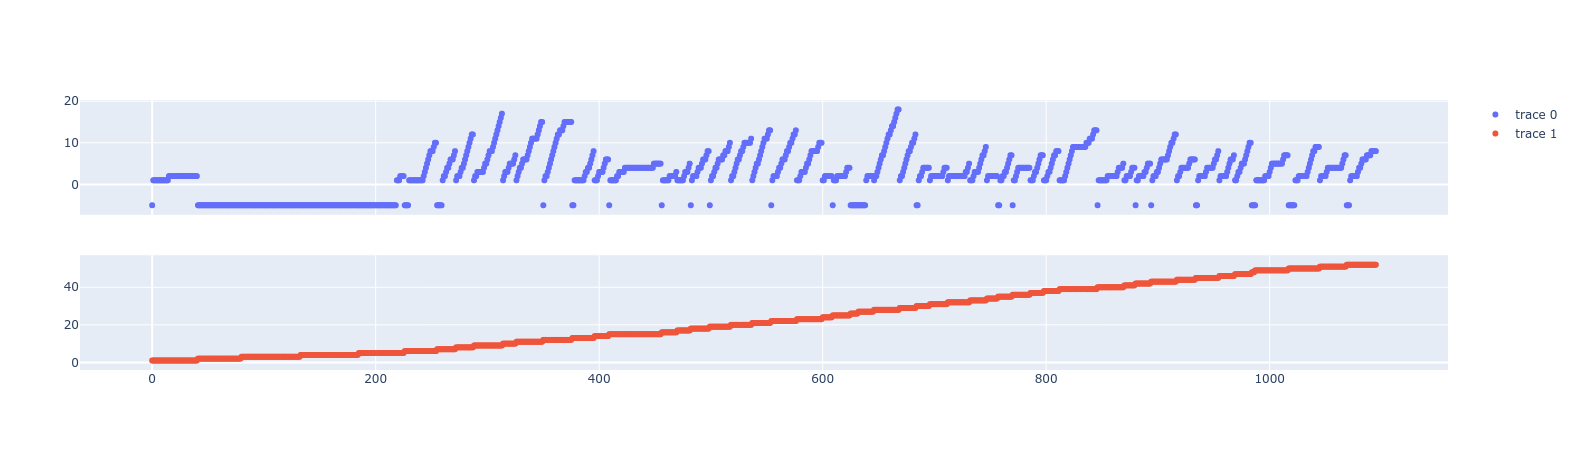

In [634]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

schuze = 1
print(x[(x.schuze == schuze) & (x.turn == 6) & (x.id_rec == 10)])
fig = make_subplots(rows=2, shared_xaxes=True)
fig.add_trace(go.Scatter(y = x[x.schuze == schuze].id_rec.astype('Int64').fillna(-5), mode="markers", hovertemplate="id_rec: %{y}<extra></extra>"), row=1,col=1)
fig.add_trace(go.Scatter(y = x[x.schuze == schuze].turn.astype('Int64').fillna(-5), mode="markers", hovertemplate="turn: %{y}<extra></extra>"), row=2, col=1)

Empty DataFrame
Columns: [id_steno, id_osoba, aname, id_bod, druh, druh_CAT, id_org, schuze, turn, od_steno, jd, od_t, do_t, od_steno_DT, pred, prijmeni, jmeno, za, narozeni, pohlavi, zmena, umrti]
Index: []

[0 rows x 22 columns]


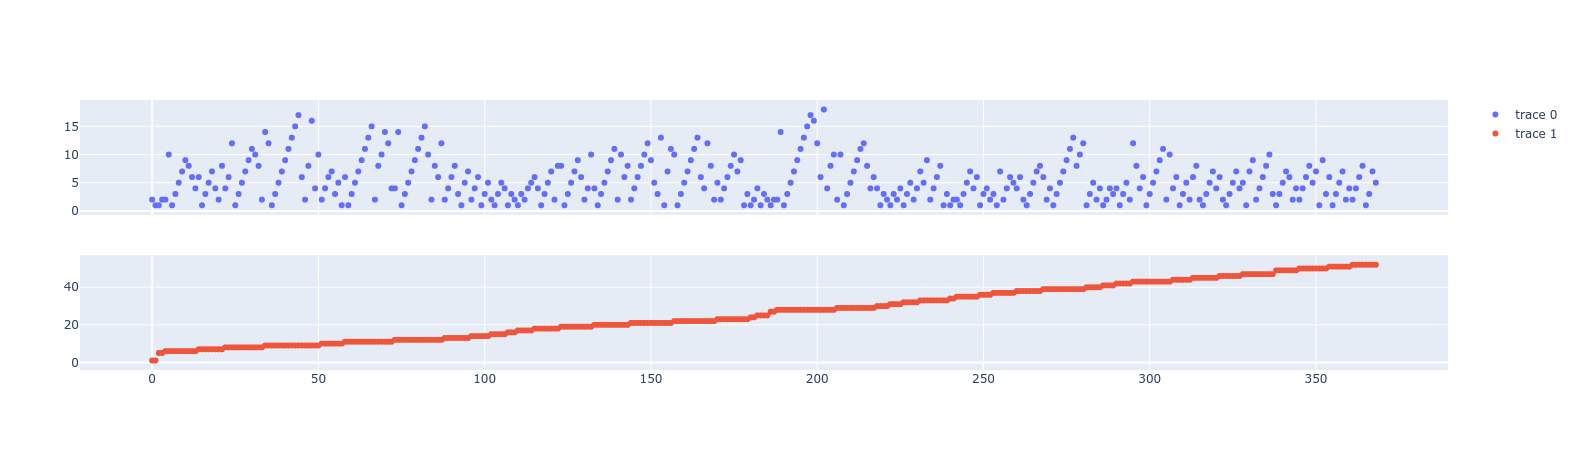

In [637]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

schuze = 1
print(y[(y.schuze == schuze) & (y.turn == 7) & (y.aname == 10)])
fig = make_subplots(rows=2, shared_xaxes=True)
fig.add_trace(go.Scatter(y = y[y.schuze == schuze].aname.astype('Int64').fillna(-5), mode="markers", hovertemplate="aname: %{y}<extra></extra>"), row=1,col=1)
fig.add_trace(go.Scatter(y = y[y.schuze == schuze].turn.astype('Int64').fillna(-5), mode="markers", hovertemplate="turn: %{y}<extra></extra>"), row=2, col=1)

In [628]:
# recnik je identifikovany v ramci jednoho stenozaznamu (turn)
y[(y.schuze == schuze)].groupby(['turn', 'aname', 'id_osoba']).size()

turn  aname  id_osoba
1     1      5462        1
      2      303         1
5     1      5462        1
      2      6211        1
6     1      5462        1
                        ..
52    4      5462        1
      5      6303        1
      6      5462        1
      7      6211        1
      8      5462        1
Length: 369, dtype: int64

In [521]:
y = s.steno_rec.copy()
y[(y.schuze == 1) & (y.turn == 6) & (y.aname == 6)]

,id_steno,id_osoba,aname,id_bod,druh,druh_CAT,id_org,schuze,turn,od_steno,...,do_t,od_steno_DT,pred,prijmeni,jmeno,za,narozeni,pohlavi,zmena,umrti
12,115475,5926,6,34930,5,řečník,172,1,6,2017-11-20,...,840,2017-11-20 00:00:00+01:00,JUDr.,Chvojka,Jan,,1980-12-17,M,NaT,NaT


In [533]:
one = x.set_index(['schuze', 'turn', 'id_rec']).sort_values(by=['schuze', 'turn', 'id_rec'])
two = y.set_index(['schuze', 'turn', 'aname']).sort_values(by=['schuze', 'turn', 'aname'])
one.index.size, two.index.size

(2161, 67497)

In [567]:
x[(x.id_rec.isna()) & (~x.je_poznamka)].groupby(['schuze', 'turn', 'id_rec']).index

AttributeError: 'DataFrameGroupBy' object has no attribute 'index'

In [576]:
x[~x.id_rec.isna()].groupby(['schuze', 'turn', 'date', 'id_rec', 'id_osoba']).size() #.sort_values(by=['schuze', 'turn', 'id_rec'])

schuze  turn  date        id_rec  id_osoba  Unnamed: 0
1       1     2017-11-20  1       5462      1             1
                                            2             1
                                            3             1
                                            4             1
                                            5             1
                                                         ..
3       17    2017-12-05  4       5926      2156          1
                          5       6105      2157          1
                          6       6292      2158          1
                                            2159          1
                                            2160          1
Length: 1715, dtype: int64

In [535]:
x[(x.schuze ==1) & (x.turn == 1)].head()

,Unnamed: 0,text,text_s_poznamkami,schuze,turn,id_rec,poznamka,je_poznamka,cas,typ_casu,date,id_osoba,od_steno_DT
0,0,<NA>,(Schůze zahájena ve 13.00 hodin.),1,1,<NA>,['Schůze zahájena ve 13.00 hodin.'],True,13:00,zahájení,2017-11-20,<NA>,2017-11-20 00:00:00+01:00
1,1,"Vážené paní poslankyně, vážení páni poslanci, ...","Vážené paní poslankyně, vážení páni poslanci, ...",1,1,1,NaN,False,<NA>,<NA>,2017-11-20,5462,2017-11-20 00:00:00+01:00
2,2,"Prosím, abychom všichni povstali. Naše jednání...","Prosím, abychom všichni povstali. Naše jednání...",1,1,1,['Děje se. Zazněla státní hymna České republik...,False,<NA>,<NA>,2017-11-20,5462,2017-11-20 00:00:00+01:00
3,3,"Vážené paní poslankyně, vážení páni poslanci, ...","Vážené paní poslankyně, vážení páni poslanci, ...",1,1,1,NaN,False,<NA>,<NA>,2017-11-20,5462,2017-11-20 00:00:00+01:00
4,4,Pořad ustavující schůze je dán příslušnými ust...,Pořad ustavující schůze je dán příslušnými ust...,1,1,1,NaN,False,<NA>,<NA>,2017-11-20,5462,2017-11-20 00:00:00+01:00


In [536]:
y[(y.schuze ==1) & (y.turn == 1)].head()

,id_steno,id_osoba,aname,id_bod,druh,druh_CAT,id_org,schuze,turn,od_steno,...,do_t,od_steno_DT,pred,prijmeni,jmeno,za,narozeni,pohlavi,zmena,umrti
0,115470,303,2,34928,5,řečník,172,1,1,2017-11-20,...,790,2017-11-20 00:00:00+01:00,JUDr.,Filip,Vojtěch,,1955-01-13,M,1998-07-12,NaT
1,115470,5462,1,<NA>,4,předsedající,172,1,1,2017-11-20,...,790,2017-11-20 00:00:00+01:00,,Hamáček,Jan,,1978-04-11,M,NaT,NaT


In [524]:
two.head()

id_steno  id_osoba  id_bod  druh      druh_CAT  id_org  \
schuze turn aname                                                           
1      1    1        115470      5462    <NA>     4  předsedající     172   
            2        115470       303   34928     5        řečník     172   
       5    1        115474      5462   34928     4  předsedající     172   
            2        115474      6211   34929     5        řečník     172   
       6    1        115475      5462   34929     4  předsedající     172   

                     od_steno  jd  od_t  do_t               od_steno_DT  \
schuze turn aname                                                         
1      1    1      2017-11-20   1   780   790 2017-11-20 00:00:00+01:00   
            2      2017-11-20   1   780   790 2017-11-20 00:00:00+01:00   
       5    1      2017-11-20   1   820   830 2017-11-20 00:00:00+01:00   
            2      2017-11-20   1   820   830 2017-11-20 00:00:00+01:00   
       6    1      2017-11-20   1   830   840 2017-11-20 00:00:00+01:00   

                    pred     prijmeni    jmeno za   narozeni pohlavi  \
schuze turn aname                                                      
1      1    1                 Hamáček      Jan    1978-04-11       M   
            2      JUDr.        Filip  Vojtěch    1955-01-13       M   
       5    1                 Hamáček      Jan    1978-04-11       M   
            2       Ing.  Kolovratník   Martin    1975-11-04       M   
       6    1                 Hamáček      Jan    1978-04-11       M   

                       zmena umrti  
schuze turn aname                   
1      1    1            NaT   NaT  
            2     1998-07-12   NaT  
       5    1            NaT   NaT  
            2            NaT   NaT  
       6    1            NaT   NaT

In [577]:
#x['id_osoba'] = x.groupby(['schuze', 'date'])['id_osoba'].fillna(method='ffill')  .... reci je vic nez osob
#x['id_rec'] = x.groupby(['schuze', 'date'])['id_rec'].fillna(method='ffill')

In [592]:
m = pd.merge(left=x, right=y[['schuze', "turn", "aname", 'id_osoba']], left_on=["schuze", "turn", "id_rec"], right_on=["schuze", "turn", "aname"], how="left")
ids = m[m.id_osoba_x.eq(m.id_osoba_y)].index
ne_ids = set(m.index)-set(ids)
assert m[m.index.isin(ne_ids) & (~m.id_osoba_x.isna())].size / m[m.index.isin(ne_ids)].size < 0.1 # This is a consistency sanity check
m['id_osoba'] = m['id_osoba_y']
m = m.drop(labels=['id_osoba_x', 'id_osoba_y', 'aname'], axis=1)
m[(m.schuze == 3) & (m.turn == 2) & (m.id_rec == 2)]

,Unnamed: 0,text,text_s_poznamkami,schuze,turn,id_rec,poznamka,je_poznamka,cas,typ_casu,date,od_steno_DT,id_osoba
1852,1852,"Ministr financí ČR Ivan Pilný Děkuji, pane pře...","Ministr financí ČR Ivan Pilný Děkuji, pane pře...",3,2,2,NaN,False,<NA>,<NA>,2017-12-05,2017-12-05 00:00:00+01:00,6231
1853,1853,Takže základní rámec státního rozpočtu pro rok...,Takže základní rámec státního rozpočtu pro rok...,3,2,2,NaN,False,<NA>,<NA>,2017-12-05,2017-12-05 00:00:00+01:00,6231
1854,1854,"Příjmy státního rozpočtu 1 bil. 314,5 mld. Výd...","Příjmy státního rozpočtu 1 bil. 314,5 mld. Výd...",3,2,2,NaN,False,<NA>,<NA>,2017-12-05,2017-12-05 00:00:00+01:00,6231
1855,1855,Makroekonomický rámec návrhu státního rozpočtu...,Makroekonomický rámec návrhu státního rozpočtu...,3,2,2,NaN,False,<NA>,<NA>,2017-12-05,2017-12-05 00:00:00+01:00,6231
1856,1856,Růst české ekonomiky v roce 2017 odráží vysoké...,Růst české ekonomiky v roce 2017 odráží vysoké...,3,2,2,NaN,False,<NA>,<NA>,2017-12-05,2017-12-05 00:00:00+01:00,6231
1857,1857,Inflace v roce 2017 a 2018 by se měla držet mí...,Inflace v roce 2017 a 2018 by se měla držet mí...,3,2,2,NaN,False,<NA>,<NA>,2017-12-05,2017-12-05 00:00:00+01:00,6231
1858,1858,V souvislosti s hospodářským růstem očekáváme ...,V souvislosti s hospodářským růstem očekáváme ...,3,2,2,NaN,False,<NA>,<NA>,2017-12-05,2017-12-05 00:00:00+01:00,6231
1859,1859,Vývoj běžného účtu platební bilance pro českou...,Vývoj běžného účtu platební bilance pro českou...,3,2,2,NaN,False,<NA>,<NA>,2017-12-05,2017-12-05 00:00:00+01:00,6231
1860,1860,Ministerstvo financí nepřetržitě sleduje progn...,Ministerstvo financí nepřetržitě sleduje progn...,3,2,2,NaN,False,<NA>,<NA>,2017-12-05,2017-12-05 00:00:00+01:00,6231
1861,1861,Fiskální pozice České republiky je zejména v p...,Fiskální pozice České republiky je zejména v p...,3,2,2,NaN,False,<NA>,<NA>,2017-12-05,2017-12-05 00:00:00+01:00,6231


In [583]:
y[(y.schuze == 3) & (y.turn == 4)]

,id_steno,id_osoba,aname,id_bod,druh,druh_CAT,id_org,schuze,turn,od_steno,...,do_t,od_steno_DT,pred,prijmeni,jmeno,za,narozeni,pohlavi,zmena,umrti
609,115574,303,1,35005,4,předsedající,172,3,4,2017-12-05,...,880,2017-12-05 00:00:00+01:00,JUDr.,Filip,Vojtěch,,1955-01-13,M,1998-07-12,NaT
610,115574,5268,2,35005,5,řečník,172,3,4,2017-12-05,...,880,2017-12-05 00:00:00+01:00,Ing.,Vostrá,Miloslava,,1965-05-26,Ž,NaT,NaT


In [526]:
x[(x.schuze == 1) & (x.turn == 6) & (x.id_rec == 6)][['id_osoba']]

,id_osoba
247,5926


In [527]:
x[x.je_poznamka != False].id_osoba.value_counts()

6165    9
5462    8
6531    3
4778    1
Name: id_osoba, dtype: Int64

In [528]:
fields = ['schuze', 'turn', 'id_rec', 'id_osoba']
x[x.id_osoba.isna()].apply(lambda i: len(y[(y.schuze == i['schuze']) & (y.turn == i['turn']) & (y.aname == i['id_rec'])]), axis=1).describe()

count    446.0
mean       0.0
std        0.0
min        0.0
25%        0.0
50%        0.0
75%        0.0
max        0.0
dtype: float64

In [519]:
#suffix = "__osoby"
#x = pd.merge(left=x, right=s.osoby, on='id_osoba', suffixes = ("", suffix), how='left')
#x = drop_by_inconsistency(x, suffix, 0.1)

In [531]:
#'id_osoba' and 'id_osoba__steno_rec' differ in 170 columns from 2161
#'od_steno_DT' and 'od_steno_DT__steno_rec' differ in 290 columns from 2161
#'pred' and 'pred__steno_rec' differ in 157 columns from 2161
#'prijmeni' and 'prijmeni__steno_rec' differ in 170 columns from 2161
#'jmeno' and 'jmeno__steno_rec' differ in 169 columns from 2161
#'za' and 'za__steno_rec' differ in 2 columns from 2161
#'narozeni' and 'narozeni__steno_rec' differ in 460 columns from 2161
#'pohlavi' and 'pohlavi__steno_rec' differ in 58 columns from 2161
#'zmena' and 'zmena__steno_rec' differ in 1853 columns from 2161
#'umrti' and 'umrti__steno_rec' differ in 2161 columns from 2161

suffix = "__steno_rec"
z = pd.merge(left=x[(x.je_poznamka == False) & ~(x.id_rec.isna())], right=s.steno_rec, left_on=['schuze', 'turn', 'id_rec'], right_on=['schuze', 'turn', 'aname'], suffixes = ("", suffix), how='left')
drop_by_inconsistency(z, suffix, 0.1)

'id_osoba' and 'id_osoba__steno_rec' differ in 0 columns from 1694 [difference with right nans: 0]
'od_steno_DT' and 'od_steno_DT__steno_rec' differ in 0 columns from 1694 [difference with right nans: 0]
Dropping [] because of big inconsistencies.
Dropping ['id_osoba__steno_rec', 'od_steno_DT__steno_rec'] because of abundance.


,Unnamed: 0,text,text_s_poznamkami,schuze,turn,id_rec,poznamka,je_poznamka,cas,typ_casu,...,od_t,do_t,pred,prijmeni,jmeno,za,narozeni,pohlavi,zmena,umrti
0,1,"Vážené paní poslankyně, vážení páni poslanci, ...","Vážené paní poslankyně, vážení páni poslanci, ...",1,1,1,NaN,False,<NA>,<NA>,...,780,790,,Hamáček,Jan,,1978-04-11,M,NaT,NaT
1,2,"Prosím, abychom všichni povstali. Naše jednání...","Prosím, abychom všichni povstali. Naše jednání...",1,1,1,['Děje se. Zazněla státní hymna České republik...,False,<NA>,<NA>,...,780,790,,Hamáček,Jan,,1978-04-11,M,NaT,NaT
2,3,"Vážené paní poslankyně, vážení páni poslanci, ...","Vážené paní poslankyně, vážení páni poslanci, ...",1,1,1,NaN,False,<NA>,<NA>,...,780,790,,Hamáček,Jan,,1978-04-11,M,NaT,NaT
3,4,Pořad ustavující schůze je dán příslušnými ust...,Pořad ustavující schůze je dán příslušnými ust...,1,1,1,NaN,False,<NA>,<NA>,...,780,790,,Hamáček,Jan,,1978-04-11,M,NaT,NaT
4,5,Chtěl bych vás seznámit s omluvami. Omlouvá se...,Chtěl bych vás seznámit s omluvami. Omlouvá se...,1,1,1,NaN,False,<NA>,<NA>,...,780,790,,Hamáček,Jan,,1978-04-11,M,NaT,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1689,2156,Děkuji za pozornost.,Děkuji za pozornost.,3,17,4,NaN,False,<NA>,<NA>,...,1000,1010,JUDr.,Chvojka,Jan,,1980-12-17,M,NaT,NaT
1690,2157,"Děkuji panu předsedovi Chvojkovi. Podíváme se,...","Děkuji panu předsedovi Chvojkovi. Podíváme se,...",3,17,5,NaN,False,<NA>,<NA>,...,1000,1010,,Okamura,Tomio,,1972-04-07,M,NaT,NaT
1691,2158,"Děkuji za slovo, pane předsedající. Přeji krás...","Děkuji za slovo, pane předsedající. Přeji krás...",3,17,6,NaN,False,<NA>,<NA>,...,1000,1010,Mgr. Bc.,Golasowská,Pavla,DiS.,1964-05-18,Ž,NaT,NaT
1692,2159,"V rozpočtu na sociální služby, jak už tady něk...","V rozpočtu na sociální služby, jak už tady něk...",3,17,6,NaN,False,<NA>,<NA>,...,1000,1010,Mgr. Bc.,Golasowská,Pavla,DiS.,1964-05-18,Ž,NaT,NaT


In [479]:
y[y.id_osoba.isna() & (y.je_poznamka == False)]

,Unnamed: 0,text,text_s_poznamkami,schuze,turn,id_rec,poznamka,je_poznamka,cas,typ_casu,...,do_t,od_steno_DT__steno_rec,pred,prijmeni,jmeno,za,narozeni,pohlavi,zmena,umrti


In [480]:
np.nan == np.nan

False

In [530]:
np.nan == 3

False

In [481]:
y.columns[y.columns.str.endswith(suffix)]

Index(['id_osoba__steno_rec', 'od_steno_DT__steno_rec'], dtype='object')

In [483]:
y[y.id_osoba.ne(y.id_osoba__steno_rec)] [['od_steno_DT', 'od_steno_DT__steno_rec', 'id_osoba', 'id_osoba__steno_rec', 'jmeno', 'prijmeni', 'text', 'schuze', 'turn', 'id_rec']]

,od_steno_DT,od_steno_DT__steno_rec,id_osoba,id_osoba__steno_rec,jmeno,prijmeni,text,schuze,turn,id_rec
184,2017-11-20 00:00:00+01:00,2017-11-20 00:00:00+01:00,303,6211,Martin,Kolovratník,Paní Lucie Šafránková.,1,5,2
185,2017-11-20 00:00:00+01:00,2017-11-20 00:00:00+01:00,303,6211,Martin,Kolovratník,Paní Karla Šlechtová.,1,5,2
186,2017-11-20 00:00:00+01:00,2017-11-20 00:00:00+01:00,303,6211,Martin,Kolovratník,Pan Lubomír Španěl.,1,5,2
187,2017-11-20 00:00:00+01:00,2017-11-20 00:00:00+01:00,303,6211,Martin,Kolovratník,Pan Julius Špičák.,1,5,2
188,2017-11-20 00:00:00+01:00,2017-11-20 00:00:00+01:00,303,6211,Martin,Kolovratník,Pan David Štolpa.,1,5,2
...,...,...,...,...,...,...,...,...,...,...
2070,2017-12-05 00:00:00+01:00,2017-12-05 00:00:00+01:00,6231,6450,Mikuláš,Ferjenčík,Pokud se týká toho prvního příspěvku pana před...,3,15,2
2071,2017-12-05 00:00:00+01:00,2017-12-05 00:00:00+01:00,6231,6450,Mikuláš,Ferjenčík,"Takže to je asi krátce tak, jak jsem byl schop...",3,15,2
2093,2017-12-05 00:00:00+01:00,2017-12-05 00:00:00+01:00,303,6105,Tomio,Okamura,Takže si dovolím učinit takovou drobnou výzvu....,3,17,1
2094,2017-12-05 00:00:00+01:00,2017-12-05 00:00:00+01:00,303,6105,Tomio,Okamura,A takových příkladů bych mohl uvést mnoho. Tak...,3,17,1


In [371]:
fields = ["text_s_poznamkami", "od_steno_DT", "od_steno_DT__steno_rec", "id_osoba", "id_osoba__steno_rec"]
y[(y.je_poznamka == False) & (y.schuze == 1) & (y.turn == 5) & (y.id_rec == 2)][fields]

,text_s_poznamkami,od_steno_DT,od_steno_DT__steno_rec,id_osoba,id_osoba__steno_rec
222,"Děkuji za slovo. Vážený pane předsedající, váž...",2017-11-20 00:00:00+01:00,2017-11-20 00:00:00+01:00,6211,6211
223,"Dovolte mi, abych před vás předstoupil jménem ...",2017-11-20 00:00:00+01:00,2017-11-20 00:00:00+01:00,6211,6211
224,"Nyní informace, které mám pro vás připravené o...",2017-11-20 00:00:00+01:00,2017-11-20 00:00:00+01:00,6211,6211
225,"Jak už avizoval pan předsedající, nyní poprosí...",2017-11-20 00:00:00+01:00,2017-11-20 00:00:00+01:00,6211,6211


In [20]:
steno_rec = StenoRec(volebni_obdobi=2017)

--> Organy
--> Osoby
./schuze.zip
Checking for: ['./bod_stav.unl']
Missing files: []
Tabulka bod_stav:
Přetypovávám sloupec: 'id_bod_stav'.
Přetypovávám sloupec: 'popis'.
Checking for: ['./bod_stav.unl', './bod_schuze.unl']
Missing files: []
Tabulka bod_schuze:
Přetypovávám sloupec: 'id_bod'.
Přetypovávám sloupec: 'id_schuze'.
Přetypovávám sloupec: 'id_tisk'.
Přetypovávám sloupec: 'id_typ'.
Přetypovávám sloupec: 'bod'.
Přetypovávám sloupec: 'uplny_naz'.
Přetypovávám sloupec: 'uplny_kon'.
Přetypovávám sloupec: 'poznamka'.
Přetypovávám sloupec: 'id_bod_stav'.
Přetypovávám sloupec: 'pozvanka'.
Přetypovávám sloupec: 'rj'.
Přetypovávám sloupec: 'pozn2'.
Přetypovávám sloupec: 'druh_bodu'.
Přetypovávám sloupec: 'id_sd'.
Přetypovávám sloupec: 'zkratka'.
Dropping [] because of big inconsistencies.
Dropping [] because of abundance.
./poslanci.zip
Checking for: ['./bod_stav.unl', './bod_schuze.unl', './osoby.unl', './osoba_extra.unl']
Missing files: []
Tabulka osoby:
Přetypovávám sloupec: 'id_oso

In [18]:
steno = Steno(volebni_obdobi=2017)

--> Organy
./poslanci.zip
Checking for: ['./typ_organu.unl']
Missing files: []
Tabulka typ_organu:
Přetypovávám sloupec: 'id_typ_org'.
Přetypovávám sloupec: 'typ_id_typ_org'.
Přetypovávám sloupec: 'nazev_typ_org_cz'.
Přetypovávám sloupec: 'nazev_typ_org_en'.
Přetypovávám sloupec: 'typ_org_obecny'.
Přetypovávám sloupec: 'priorita'.
./poslanci.zip
Checking for: ['./typ_organu.unl', './funkce.unl', './organy.unl']
Missing files: []
Tabulka organy:
Přetypovávám sloupec: 'id_organ'.
Přetypovávám sloupec: 'organ_id_organ'.
Přetypovávám sloupec: 'id_typ_organu'.
Přetypovávám sloupec: 'zkratka'.
Přetypovávám sloupec: 'nazev_organu_cz'.
Přetypovávám sloupec: 'nazev_organu_en'.
Přetypovávám sloupec: 'od_organ'.
Přetypovávám sloupec: 'do_organ'.
Přetypovávám sloupec: 'priorita'.
Přetypovávám sloupec: 'cl_organ_base'.
'priorita' and 'priorita__typ_organu' differ in 265 columns from 1409
Dropping ['priorita'] because of big inconsistencies.
Dropping ['priorita__typ_organu'] because of abundance.
<-

In [10]:
st = StenoText(volebni_obdobi=2017, stahni=True)

--> Organy
--> Osoby
./schuze.zip
Checking for: ['./bod_stav.unl']
Missing files: []
Tabulka bod_stav:
Přetypovávám sloupec: 'id_bod_stav'.
Přetypovávám sloupec: 'popis'.
Checking for: ['./bod_stav.unl', './bod_schuze.unl']
Missing files: []
Tabulka bod_schuze:
Přetypovávám sloupec: 'id_bod'.
Přetypovávám sloupec: 'id_schuze'.
Přetypovávám sloupec: 'id_tisk'.
Přetypovávám sloupec: 'id_typ'.
Přetypovávám sloupec: 'bod'.
Přetypovávám sloupec: 'uplny_naz'.
Přetypovávám sloupec: 'uplny_kon'.
Přetypovávám sloupec: 'poznamka'.
Přetypovávám sloupec: 'id_bod_stav'.
Přetypovávám sloupec: 'pozvanka'.
Přetypovávám sloupec: 'rj'.
Přetypovávám sloupec: 'pozn2'.
Přetypovávám sloupec: 'druh_bodu'.
Přetypovávám sloupec: 'id_sd'.
Přetypovávám sloupec: 'zkratka'.
Dropping [] because of big inconsistencies.
Dropping [] because of abundance.
./poslanci.zip
Checking for: ['./bod_stav.unl', './bod_schuze.unl', './osoby.unl', './osoba_extra.unl']
Missing files: []
Tabulka osoby:
Přetypovávám sloupec: 'id_oso

In [189]:
steno_text.df[(steno_text.df.schuze == 1) & (steno_text.df.turn==6)].sort_values(by=['schuze', 'id_rec'])[:10]

,Unnamed: 0,text,text_s_poznamkami,schuze,turn,id_osoba,id_rec,poznamka,je_poznamka,cas,...,pohlavi,zmena,umrti,id_steno,id_org,od_steno,jd,od_t,do_t,od_steno_DT
230,230,"Děkuji, pane předsedo. K této věci otevřu rozp...","Děkuji, pane předsedo. K této věci otevřu rozp...",1,6,5462,1,NaN,False,<NA>,...,M,NaT,NaT,115475,172,2017-11-20,1,830,840,2017-11-20 00:00:00+01:00
231,231,"Usnesení, které je navrženo, zní: ""Poslanecká ...","Usnesení, které je navrženo, zní: ""Poslanecká ...",1,6,5462,1,NaN,False,<NA>,...,M,NaT,NaT,115475,172,2017-11-20,1,830,840,2017-11-20 00:00:00+01:00
232,232,"Nyní tedy zahajuji rozpravu a zeptám se, zda s...","Nyní tedy zahajuji rozpravu a zeptám se, zda s...",1,6,5462,1,NaN,False,<NA>,...,M,NaT,NaT,115475,172,2017-11-20,1,830,840,2017-11-20 00:00:00+01:00
233,233,Přistoupíme tedy k prvnímu hlasování na této s...,Přistoupíme tedy k prvnímu hlasování na této s...,1,6,5462,1,NaN,False,<NA>,...,M,NaT,NaT,115475,172,2017-11-20,1,830,840,2017-11-20 00:00:00+01:00
234,234,"Zahajuji hlasování a ptám se, kdo souhlasí s n...","Zahajuji hlasování a ptám se, kdo souhlasí s n...",1,6,5462,1,NaN,False,<NA>,...,M,NaT,NaT,115475,172,2017-11-20,1,830,840,2017-11-20 00:00:00+01:00
235,235,"Aha, tak toto hlasování prohlašuji za zmatečné...","Aha, tak toto hlasování prohlašuji za zmatečné...",1,6,5462,1,NaN,False,<NA>,...,M,NaT,NaT,115475,172,2017-11-20,1,830,840,2017-11-20 00:00:00+01:00
236,236,"Je to v pořádku, takže budeme hlasovat ještě j...","Je to v pořádku, takže budeme hlasovat ještě j...",1,6,5462,1,NaN,False,<NA>,...,M,NaT,NaT,115475,172,2017-11-20,1,830,840,2017-11-20 00:00:00+01:00
237,237,"Zahajuji hlasování a ptám se, kdo je pro. Kdo ...","Zahajuji hlasování a ptám se, kdo je pro. Kdo ...",1,6,5462,1,NaN,False,<NA>,...,M,NaT,NaT,115475,172,2017-11-20,1,830,840,2017-11-20 00:00:00+01:00
238,238,Je to tedy hlasování číslo 2 . Přihlášeno je 1...,Je to tedy hlasování číslo 2 . Přihlášeno je 1...,1,6,5462,1,NaN,False,<NA>,...,M,NaT,NaT,115475,172,2017-11-20,1,830,840,2017-11-20 00:00:00+01:00
239,239,"Tím mám za to, že jsme vyčerpali všechno z bod...","Tím mám za to, že jsme vyčerpali všechno z bod...",1,6,5462,1,NaN,False,<NA>,...,M,NaT,NaT,115475,172,2017-11-20,1,830,840,2017-11-20 00:00:00+01:00


In [190]:
df = steno_texty._steno_texty
df[(df.id_osoba.isna())].id_osoba.size, df[(df.id_rec.isna())].id_rec.size

(1551, 1506)

In [160]:
x = df.rename({"id_rec": "aname"}, axis='columns')[~(df.schuze.isna() | df.turn.isna() | df.id_rec.isna())].set_index(["schuze", "turn", "aname"])
y = steno_texty._steno_texty

Unnamed: 0  \
schuze turn aname               
1      1    1               1   
            2              15   
       5    1             219   
            2             222   
       6    1             230   
...                       ...   
3      17   2            2150   
            3            2153   
            4            2154   
            5            2157   
            6            2158   

                                                                text  \
schuze turn aname                                                      
1      1    1      Vážené paní poslankyně, vážení páni poslanci, ...   
            2      Vážené paní poslankyně, vážení páni poslanci -...   
       5    1      Prosím, posaďte se. Chtěl bych poděkovat panu ...   
            2      Děkuji za slovo. Vážený pane předsedající, váž...   
       6    1      Děkuji, pane předsedo. K této věci otevřu rozp...   
...                                                              ...   
3      17   2      Ministr financí ČR Ivan Pilný Děkuji za slovo,...   
            3      Já děkuji panu ministrovi Pilnému. Máme nějako...   
            4      Ministr vlády ČR Jan Chvojka Děkuji za slovo, ...   
            5      Děkuji panu předsedovi Chvojkovi. Podíváme se,...   
            6      Děkuji za slovo, pane předsedající. Přeji krás...   

                                                   text_s_poznamkami  \
schuze turn aname                                                      
1      1    1      Vážené paní poslankyně, vážení páni poslanci, ...   
            2      Vážené paní poslankyně, vážení páni poslanci -...   
       5    1      Prosím, posaďte se. Chtěl bych poděkovat panu ...   
            2      Děkuji za slovo. Vážený pane předsedající, váž...   
       6    1      Děkuji, pane předsedo. K této věci otevřu rozp...   
...                                                              ...   
3      17   2      Ministr financí ČR Ivan Pilný Děkuji za slovo,...   
            3      Já děkuji panu ministrovi Pilnému. Máme nějako...   
            4      Ministr vlády ČR Jan Chvojka Děkuji za slovo, ...   
            5      Děkuji panu předsedovi Chvojkovi. Podíváme se,...   
            6      Děkuji za slovo, pane předsedající. Přeji krás...   

                   id_osoba poznamka  je_poznamka   cas typ_casu  
schuze turn aname                                                 
1      1    1          5462      NaN        False  <NA>     <NA>  
            2           303      NaN        False  <NA>     <NA>  
       5    1          5462      NaN        False  <NA>     <NA>  
            2          6211      NaN        False  <NA>     <NA>  
       6    1          5462      NaN        False  <NA>     <NA>  
...                     ...      ...          ...   ...      ...  
3      17   2          <NA>      NaN        False  <NA>     <NA>  
            3          6105      NaN        False  <NA>     <NA>  
            4          <NA>      NaN        False  <NA>     <NA>  
            5          6105      NaN        False  <NA>     <NA>  
            6          6292      NaN        False  <NA>     <NA>  

[655 rows x 8 columns]

In [112]:
m = pd.merge(left=df, right=steno_texty.steno_rec, left_on=["schuze", "turn", "id_rec"], right_on=["schuze", "turn", "aname"], how="left")
m.columns

Index(['Unnamed: 0', 'text', 'text_s_poznamkami', 'schuze', 'turn',
       'id_osoba_x', 'id_rec', 'poznamka', 'je_poznamka', 'cas', 'typ_casu',
       'id_steno', 'id_osoba_y', 'aname', 'id_bod', 'druh', 'druh_CAT',
       'id_org', 'od_steno', 'jd', 'od_t', 'do_t', 'od_steno_DT', 'pred',
       'prijmeni', 'jmeno', 'za', 'narozeni', 'pohlavi', 'zmena', 'umrti'],
      dtype='object')

In [123]:
m[(m.schuze == 1) & (m.turn == 6) & (m.id_rec == 6)][['id_osoba_x', 'id_osoba_y', 'text']]

,id_osoba_x,id_osoba_y,text
247,<NA>,5926,Ministr vlády ČR Jan Chvojka Děkuji za slovo. ...


In [171]:
ids = m[m.id_osoba_x.eq(m.id_osoba_y)].index
ne_ids = set(m.index)-set(ids)
assert m[m.index.isin(ne_ids)].id_osoba_x.value_counts().size  == 0 # This should be asserted if I want to escape contradiction

assert m[m.index.isin(ne_ids) & (~m.id_osoba_x.isna())].size / m[m.index.isin(ne_ids)].size < 0.1

In [172]:
m.drop(labels=['id_osoba_x', 'aname'], axis=1)

,Unnamed: 0,text,text_s_poznamkami,schuze,turn,id_rec,poznamka,je_poznamka,cas,typ_casu,...,do_t,od_steno_DT,pred,prijmeni,jmeno,za,narozeni,pohlavi,zmena,umrti
0,0,<NA>,(Schůze zahájena ve 13.00 hodin.),1,1,<NA>,['Schůze zahájena ve 13.00 hodin.'],True,13:00,zahájení,...,<NA>,NaT,<NA>,<NA>,<NA>,<NA>,NaT,<NA>,NaT,NaT
1,1,"Vážené paní poslankyně, vážení páni poslanci, ...","Vážené paní poslankyně, vážení páni poslanci, ...",1,1,1,NaN,False,<NA>,<NA>,...,790,2017-11-20 00:00:00+01:00,,Hamáček,Jan,,1978-04-11,M,NaT,NaT
2,2,"Prosím, abychom všichni povstali. Naše jednání...","Prosím, abychom všichni povstali. Naše jednání...",1,1,<NA>,['Děje se. Zazněla státní hymna České republik...,False,<NA>,<NA>,...,<NA>,NaT,<NA>,<NA>,<NA>,<NA>,NaT,<NA>,NaT,NaT
3,3,"Vážené paní poslankyně, vážení páni poslanci, ...","Vážené paní poslankyně, vážení páni poslanci, ...",1,1,<NA>,NaN,False,<NA>,<NA>,...,<NA>,NaT,<NA>,<NA>,<NA>,<NA>,NaT,<NA>,NaT,NaT
4,4,Pořad ustavující schůze je dán příslušnými ust...,Pořad ustavující schůze je dán příslušnými ust...,1,1,<NA>,NaN,False,<NA>,<NA>,...,<NA>,NaT,<NA>,<NA>,<NA>,<NA>,NaT,<NA>,NaT,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2156,2156,Děkuji za pozornost.,Děkuji za pozornost.,3,17,<NA>,NaN,False,<NA>,<NA>,...,<NA>,NaT,<NA>,<NA>,<NA>,<NA>,NaT,<NA>,NaT,NaT
2157,2157,"Děkuji panu předsedovi Chvojkovi. Podíváme se,...","Děkuji panu předsedovi Chvojkovi. Podíváme se,...",3,17,5,NaN,False,<NA>,<NA>,...,1010,2017-12-05 00:00:00+01:00,,Okamura,Tomio,,1972-04-07,M,NaT,NaT
2158,2158,"Děkuji za slovo, pane předsedající. Přeji krás...","Děkuji za slovo, pane předsedající. Přeji krás...",3,17,6,NaN,False,<NA>,<NA>,...,1010,2017-12-05 00:00:00+01:00,Mgr. Bc.,Golasowská,Pavla,DiS.,1964-05-18,Ž,NaT,NaT
2159,2159,"V rozpočtu na sociální služby, jak už tady něk...","V rozpočtu na sociální služby, jak už tady něk...",3,17,<NA>,NaN,False,<NA>,<NA>,...,<NA>,NaT,<NA>,<NA>,<NA>,<NA>,NaT,<NA>,NaT,NaT


In [191]:
# steno groupby 'schuze' & 'turn' je unique --> muzu vzit odpovidajici 'id_steno'
steno.df.groupby(by=['schuze', 'turn']).size().sort_values()

schuze  turn
1       1       1
40      368     1
        369     1
        370     1
        371     1
               ..
26      282     1
        283     1
        284     1
        286     1
81      24      1
Length: 9528, dtype: int64

In [197]:
steno_text.df[(steno_text.df.id_steno == 115475) & (steno_text.df.schuze == 1) & (steno_text.df.turn == 6) & (steno_text.df.id_rec == 6)].prijmeni

247    Hamáček
Name: prijmeni, dtype: string

In [69]:
fields = ['id_steno', 'id_osoba', 'id_rec', 'schuze', 'turn']
steno_text.df[steno_text.df.id_steno == 115475].groupby(["schuze", "turn", "id_rec", "id_osoba"]).size()

schuze  turn  id_rec  id_osoba
1       6     1       5462        13
              2       309          1
                      6211         4
              3       5462         1
              4       6190         1
              5       5462         1
              6       5462         1
              7       5462         1
              8       5909         3
              9       5462         1
              10      401          2
dtype: int64

In [58]:
steno_rec.df[steno_rec.df.id_steno == 115475].sort_values(by="aname")

,id_steno,id_osoba,aname,id_bod,druh,druh_CAT,id_org,schuze,turn,od_steno,...,do_t,od_steno_DT,pred,prijmeni,jmeno,za,narozeni,pohlavi,zmena,umrti
6,115475,5462,1,34929,4,předsedající,172,1,6,2017-11-20,...,840,2017-11-20 00:00:00+01:00,,Hamáček,Jan,,1978-04-11,M,NaT,NaT
4,115475,309,2,34930,5,řečník,172,1,6,2017-11-20,...,840,2017-11-20 00:00:00+01:00,Ing.,Kováčik,Pavel,,1955-02-07,M,1998-07-12,NaT
7,115475,5462,3,34930,4,předsedající,172,1,6,2017-11-20,...,840,2017-11-20 00:00:00+01:00,,Hamáček,Jan,,1978-04-11,M,NaT,NaT
13,115475,6190,4,34930,5,řečník,172,1,6,2017-11-20,...,840,2017-11-20 00:00:00+01:00,Ing.,Faltýnek,Jaroslav,,1962-04-28,M,NaT,NaT
8,115475,5462,5,34930,4,předsedající,172,1,6,2017-11-20,...,840,2017-11-20 00:00:00+01:00,,Hamáček,Jan,,1978-04-11,M,NaT,NaT
12,115475,5926,6,34930,5,řečník,172,1,6,2017-11-20,...,840,2017-11-20 00:00:00+01:00,JUDr.,Chvojka,Jan,,1980-12-17,M,NaT,NaT
9,115475,5462,7,34930,4,předsedající,172,1,6,2017-11-20,...,840,2017-11-20 00:00:00+01:00,,Hamáček,Jan,,1978-04-11,M,NaT,NaT
11,115475,5909,8,34930,5,řečník,172,1,6,2017-11-20,...,840,2017-11-20 00:00:00+01:00,Mgr.,Farský,Jan,,1979-11-07,M,NaT,NaT
10,115475,5462,9,34930,4,předsedající,172,1,6,2017-11-20,...,840,2017-11-20 00:00:00+01:00,,Hamáček,Jan,,1978-04-11,M,NaT,NaT
5,115475,401,10,34930,5,řečník,172,1,6,2017-11-20,...,840,2017-11-20 00:00:00+01:00,,Němcová,Miroslava,,1952-11-17,Ž,1998-08-12,NaT


In [35]:
steno_text.df.groupby(["schuze", "turn", "id_rec"]).size()[:20]

schuze  turn  id_rec
1       1     1         14
              2         26
        2     2         39
        3     2         53
        4     2         52
        5     1          3
              2         38
        6     1         13
              2          5
              3          1
              4          1
              5          1
              6          1
              7          1
              8          3
              9          1
              10         2
        7     1          1
              2          2
              3          1
dtype: int64

In [34]:
steno_rec.df.groupby(["schuze", "turn", "aname"]).size()[:20]

schuze  turn  aname
1       1     1        1
              2        1
        5     1        1
              2        1
        6     1        1
              2        1
              3        1
              4        1
              5        1
              6        1
              7        1
              8        1
              9        1
              10       1
        7     1        1
              2        1
              3        1
              4        1
              5        1
              6        1
dtype: int64

In [26]:
steno.df.groupby(["schuze", "turn"]).size()[:20]

schuze  turn
1       1       1
        2       1
        3       1
        4       1
        5       1
        6       1
        7       1
        8       1
        9       1
        10      1
        11      1
        12      1
        13      1
        14      1
        15      1
        16      1
        17      1
        18      1
        19      1
        20      1
dtype: int64

In [39]:
st.df.id_osoba.dtype

Int64Dtype()

In [29]:
print(st.df.iloc[1].text)

Vážené paní poslankyně, vážení páni poslanci, dovolte mi, abych vás přivítal na ustavující schůzi Poslanecké sněmovny Parlamentu České republiky.


In [30]:
st = StenoText(volebni_obdobi=2017, stahni=True)

--> Organy
--> Osoby
./schuze.zip
Checking for: ['./bod_stav.unl']
Missing files: []
Tabulka bod_stav:
Přetypovávám sloupec: 'id_bod_stav'.
Přetypovávám sloupec: 'popis'.
Checking for: ['./bod_stav.unl', './bod_schuze.unl']
Missing files: []
Tabulka bod_schuze:
Přetypovávám sloupec: 'id_bod'.
Přetypovávám sloupec: 'id_schuze'.
Přetypovávám sloupec: 'id_tisk'.
Přetypovávám sloupec: 'id_typ'.
Přetypovávám sloupec: 'bod'.
Přetypovávám sloupec: 'uplny_naz'.
Přetypovávám sloupec: 'uplny_kon'.
Přetypovávám sloupec: 'poznamka'.
Přetypovávám sloupec: 'id_bod_stav'.
Přetypovávám sloupec: 'pozvanka'.
Přetypovávám sloupec: 'rj'.
Přetypovávám sloupec: 'pozn2'.
Přetypovávám sloupec: 'druh_bodu'.
Přetypovávám sloupec: 'id_sd'.
Přetypovávám sloupec: 'zkratka'.
Dropping [] because of big inconsistencies.
Dropping [] because of abundance.
./poslanci.zip
Checking for: ['./bod_stav.unl', './bod_schuze.unl', './osoby.unl', './osoba_extra.unl']
Missing files: []
Tabulka osoby:
Přetypovávám sloupec: 'id_oso

In [31]:
st.df

,Unnamed: 0,text,schuze,turn,id_osoba,id_rec,poznamka,je_poznamka,cas,typ_casu,pred,prijmeni,jmeno,za,narozeni,pohlavi,zmena,umrti
0,0,(Schůze zahájena ve 13.00 hodin.),1,1,<NA>,<NA>,['Schůze zahájena ve 13.00 hodin.'],True,13:00:00,zahájení,<NA>,<NA>,<NA>,<NA>,NaT,<NA>,NaT,NaT
1,1,"Vážené paní poslankyně, vážení páni poslanci, ...",1,1,5462,1,NaN,False,NaN,<NA>,,Hamáček,Jan,,1978-04-11,M,NaT,NaT
2,2,"Prosím, abychom všichni povstali. Naše jednání...",1,1,5462,1,['Děje se. Zazněla státní hymna České republik...,False,NaN,<NA>,,Hamáček,Jan,,1978-04-11,M,NaT,NaT
3,3,"Vážené paní poslankyně, vážení páni poslanci, ...",1,1,5462,1,NaN,False,NaN,<NA>,,Hamáček,Jan,,1978-04-11,M,NaT,NaT
4,4,Pořad ustavující schůze je dán příslušnými ust...,1,1,5462,1,NaN,False,NaN,<NA>,,Hamáček,Jan,,1978-04-11,M,NaT,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
321,321,A já se teď zdržím těch politických proklamací...,1,10,6211,5,['?'],False,NaN,<NA>,Ing.,Kolovratník,Martin,,1975-11-04,M,NaT,NaT
322,322,"A za sebe ze své zkušenosti, co mohu říci, jak...",1,10,6211,5,NaN,False,NaN,<NA>,Ing.,Kolovratník,Martin,,1975-11-04,M,NaT,NaT
323,323,"A pak mě napadá ještě jedno možné řešení, jak ...",1,10,6211,5,NaN,False,NaN,<NA>,Ing.,Kolovratník,Martin,,1975-11-04,M,NaT,NaT
324,324,Fakticky pan poslanec Stanjura.,1,10,5462,6,NaN,False,NaN,<NA>,,Hamáček,Jan,,1978-04-11,M,NaT,NaT


In [ ]:
st.df.dtypes

In [ ]:
st.df[st.df.je_poznamka == True]

# Průzkum tabulek

In [ ]:
s = Schuze(volebni_obdobi=2017)


In [ ]:
s.schuze.head()

In [ ]:
s.df[s.df.od_schuze_DT.dt.date ==  pd.to_datetime("2020-10-20")]

In [ ]:
max_schuze_id = s.schuze[s.schuze.pozvanka.isna()].schuze.max()
set(range(max_schuze_id+1)) - set(s.schuze[s.schuze.pozvanka.isna()].schuze)
missing = set(s.schuze.schuze.unique()) - set(s.schuze[s.schuze.pozvanka.isna()].schuze.unique())
s.schuze[s.schuze.schuze.isin(missing)]

In [ ]:
chybi_podle_ordinalu = set(range(1, max_schuze_id+1)) - set(s.schuze.schuze)
print(chybi_podle_ordinalu)

In [ ]:
s.schuze['delka_schuze'] = s.schuze.do_schuze_DT - s.schuze.od_schuze_DT
s.schuze.delka_schuze

In [ ]:
s.schuze.groupby('id_schuze').delka_schuze.transform('max')

In [ ]:
s.schuze[s.schuze.delka_schuze > timedelta(days=30)]

In [ ]:
data = s.schuze[~s.schuze.delka_schuze.isna()].sort_values(by='od_schuze_DT')
data.set_index('od_schuze_DT', inplace=True)
x = data.index
y = (data.delka_schuze / timedelta(days=1)).round(2).values

# build complete timepline from start date to end date
dt_all = pd.date_range(start=data.index[0],end=data.index[-1])

# retrieve the dates that ARE in the original datset
dt_obs = [d.strftime("%Y-%m-%d") for d in pd.to_datetime(data.index)]

# define dates with missing values
dt_breaks = [d for d in dt_all.strftime("%Y-%m-%d").tolist() if not d in dt_obs]

fig = go.Figure(go.Scatter(x=x, y=y, text=data.schuze, hovertemplate="Schůze: %{text}<br>Délka: %{y} dní<br>Začátek schůze: %{x}", mode="markers", fill='tozeroy'))

fig.update_xaxes(rangebreaks=[dict(values=dt_breaks)], title="Datum")
fig.update_yaxes(title="Délka schůze [ve dnech]")

fig.show()

In [ ]:
s.df.loc[768]

In [ ]:
cond = (s.schuze.groupby('id_schuze').delka_schuze.transform('max').isna() == True)
s.schuze[cond]
#s.schuze[s.schuze.id_schuze.isin()]

In [ ]:
s.schuze.groupby(['id_schuze']).do_schuze.count().sort_values()

In [ ]:
s.schuze[s.schuze.pozvanka.isna() & s.schuze.do_schuze.isna()]

In [ ]:
s.schuze_stav.id_schuze.value_counts().sort_values()

In [ ]:
b = BodSchuze(volebni_obdobi=2017)

In [ ]:
b.df

In [ ]:
b.df.uplny_naz.to_list()[:10]

In [ ]:
b.df[b.df.id_schuze == 555].groupby('uplny_naz').size().sort_values(ascending = False)[:30]

In [ ]:
st = Steno(volebni_obdobi=2017)

In [ ]:
st.df

In [ ]:
st.df.id_steno.unique().size, st.df.id_steno.nunique()

In [ ]:
st.df.od_t.describe()

In [ ]:
sb = StenoBod(volebni_obdobi=2017)

In [ ]:
sb.df

In [ ]:
sr = StenoRec(volebni_obdobi=2017)

In [ ]:
sr.df.head()

In [ ]:
sr.df.columns

In [ ]:
sr.df.dtypes

In [ ]:
sr.df[sr.df.od_steno == "2020-10-21"]

In [ ]:
fields = ['id_steno', 'id_osoba', 'aname', 'id_bod', 'druh_CAT', 'schuze', 'turn', 'od_steno', 'jd', 'od_t', 'do_t', 'od_steno_DT',
      'prijmeni', 'jmeno', 
       ]
sr.df[(sr.df.schuze == 62) & (sr.df.jd == 2)][fields].sort_values(by=["turn", "aname"])[:20]

In [ ]:
sr.df.columns

In [ ]:
import os

import requests

from time import time

from urllib.parse import urlparse

from multiprocessing.pool import ThreadPool

In [ ]:
def stahni_stenozaznamy(arg):
    url, dir_prefix = arg
    u = urlparse(url)
    n = u.netloc
    p = u.path
    filename = os.path.basename(p)
    d = os.path.dirname(p)
    dirname = dir_prefix + '/' + n + d
    path = dirname + '/' + filename
    log.debug(f"path: '{path}'")
    Path(dirname).mkdir(parents=True, exist_ok=True)
    r = requests.get(url, stream = True)
    with open(path, 'wb') as f:
        for ch in r:
            f.write(ch)

In [ ]:
urls = [
    ('https://www.psp.cz/eknih/2017ps/stenprot/062schuz/s062031.htm', './'),
    ('https://www.psp.cz/eknih/2017ps/stenprot/062schuz/s062032.htm', './'),
    ('https://www.psp.cz/eknih/2017ps/stenprot/062schuz/s062033.htm', './')
]

ThreadPool(9).imap_unordered(stahni_stenozaznamy, urls)

In [ ]:
sr.df[(sr.df.schuze == 62) & (sr.df.turn == 31)][fields].sort_values(by=["turn", "aname"])

In [ ]:
import re

s = "(Jednání skončilo v 15.54 hodin.) ***"

m = re.search(r'.*konč.*[^0-9]+([0-9]{1,2})\s*[.:]\s*([0-9]{2}).*hod', s) #.groups(1)
m.groups()[0], m.groups()[1]

In [ ]:
import re
from collections import namedtuple

from html2text import html2text 
from bs4 import BeautifulSoup, NavigableString

Recnik = namedtuple("Recnik", ['id_rec', 'id_osoba'])
Promluva = namedtuple('Promluva', ["text", "recnik", "rid", "cas_od", "cas_do"])
Cas = namedtuple('Cas', ['typ', 'hodina', 'minuta'])

def flatten(ary):
    return [item for sublist in ary for item in sublist]

def polish(text):
    text = text.strip()
    text = re.sub(r'\n', ' ', text)
    text = re.sub(r'[ ]+', r' ', text)
    return text

def load_soup(filename):
    data = open(filename, 'r', encoding='cp1250').read()
    return BeautifulSoup(data, 'html5lib') # Další varianty: 'lxml', 'html.parser')

def formatuj_cas(H, M):
    try:
        ret = pd.to_datetime(f"{H}:{M}", format="%H:%M").time()
        return ret
    except ValueError as e:
        print ("Value Error: Zachycena chyba. H='{H}', M='{M}'!")
        return pd.NaT

# * (poznámka) **
def je_poznamka(tag):
    return re.match('^\s*\**\s*(\(.*?\))\s*\**\s*$', tag.string) != None

# Musím vás poprosit o klid. (V sále je hluk.)
def najdi_poznamky(tag):
    return re.findall('\((.*?)\)', tag.string)

# (9.20 hodin)
def najdi_cas(tag):
    s = tag.string
    if je_poznamka(tag):
        # čas zahájení
        m = re.match(r'.*zaháj.*[^0-9]+([0-9]{1,2})\s*[.:]\s*([0-9]{2}).*hod', s)
        if m:
            return Cas('zahájení', m.groups()[0], m.groups()[1])
        
        # čas přerušení
        m = re.match(r'.*přer.*[^0-9]+([0-9]{1,2})\s*[.:]\s*([0-9]{2}).*hod', s)
        if m:
            return Cas('přerušení', m.groups()[0], m.groups()[1])
        
        # čas pokračování
        m = re.match(r'.*pokrač.*[^0-9]+([0-9]{1,2})\s*[.:]\s*([0-9]{2}).*hod', s)
        if m:
            return Cas('pokračování', m.groups()[0], m.groups()[1])
        
        # čas ukončení
        m = re.match(r'.*konč.*[^0-9]+([0-9]{1,2})\s*[.:]\s*([0-9]{2}).*hod', s)
        if m:
            return Cas('ukončení', m.groups()[0], m.groups()[1])

        # obecná časová značka
        m = re.match(r'.*[^0-9]+([0-9]{1,2})\s*[.:]\s*([0-9]{2}).*hod', s)
        if m:
            return Cas('obecně', m.groups()[0], m.groups()[1])

    return None

# https://www.psp.cz/sqw/detail.sqw?id=6452
def najdi_recnika(tag):
    if (tag.name == 'a') and tag.attrs and  tag.attrs.get('id') and (re.match(r'^r[0-9]+$', tag.attrs.get('id'))):
        id_rec = re.match(r'^r([0-9]+)$', tag.attrs.get('id')).groups()[0]
        id_osoba = None
        if tag.attrs.get('href'):
            m = re.match(r'\/sqw\/detail.sqw\?id\=([0-9]+)$', tag.attrs.get('href'))
            if m:
                id_osoba = m.groups()[0]
        return Recnik(id_rec=id_rec, id_osoba=id_osoba)
    return None

#https://www.psp.cz/sqw/historie.sqw?T=922&O=8
def najdi_tisk(tag):
    if (tag.name == 'a') and tag.attrs.get('href'):
        m = re.match(r'\/sqw\/historie.sqw\?T\=([0-9]+)\&O=([0-9])+$', tag.attrs.get('href'))
        if m:
            return m.groups()[0], m.groups()[1]
    return None

# https://www.psp.cz/sqw/hlasy.sqw?G=74037
def najdi_hlasovani(tag):
    if (tag.name == 'a') and tag.attrs.get('id') and (re.match(r'^h[0-9]+$', tag.attrs.get('id'))):
        hid = re.match(r'^h([0-9]+)$', tag.attrs.get('id')).groups()[0]
        G = None
        if tag.attrs.get('href'):
            m = re.match(r'\/sqw\/hlasy.sqw\?G\=([0-9]+)$', tag.attrs.get('href'))
            if m:
                G = m.groups()[0]
        return hid, G
    return None

def rozloz_tag(tag, text, meta):
    for child in tag.contents:
        for fce, klic in [
            [najdi_cas, 'cas'],
            [najdi_recnika, 'recnici'],
            [najdi_tisk, 'tisky'],
            [najdi_hlasovani, 'hlasovani'],
            [je_poznamka, 'je_poznamka'],
            [najdi_poznamky, 'poznamky']
        ]:
            ret = fce(child)
            if ret:
                meta[klic].append(ret)
                
            # Promluvy jsou uvozeny jmény řečníků, která je nutné odstranit.
            # Děláme to tady hodně neohrabaně tak, že nastavíme příznak pro odstranění.
            # Samotné odstranění se provádí až ve volající funkci, protože se potřebujeme zbavit ':', která není součástí aktuálního tagu.
            if (klic == 'recnici') and (len(meta['recnici']) > 0) and (len(meta['odstran']) == 0):
                meta['odstran'].append(polish(html2text(child.string)) + ' : ')
                
            # V jedné promluvě může být víc poznámek
            if (klic == 'poznamky') and (len(meta['poznamky']) > 0):
                meta['poznamky'] = flatten(meta['poznamky'])
                
        if type(child) == NavigableString:
            t = html2text(child.string)
            text.append(t)
        else:    
            rozloz_tag(child, text, meta)
    return

def rozloz_paragraf(tag):
    meta = {"recnici": [], "hlasovani": [], "tisky": [], "poznamky": [], "je_poznamka": [], "cas": [], "odstran": []}
    lines = []
    
    if tag is None:
        return [], meta
    
    # analyzuj vnořené tagy
    rozloz_tag(tag, lines, meta)
    
    text = polish(' '.join(lines))
    if (len(meta['recnici']) > 0) and (len(meta['odstran']) > 0):
        for o in meta['odstran']:
            text = re.sub(o, '', text)
    
    return {"text": text, "meta": meta}


def zpracuj_stenozaznam(filename):
    if not os.path.exists(filename):
        log.error(f"Soubor {filename} neexistuje, přeskakuji.")
        return None

    basename = os.path.basename(filename).split('.')[0]
    soup = load_soup(filename)
    body = soup.find("div", id='body')
    
    if not body:
        log.error(f"V souboru '{filename}' neobsahuje tag 'body', přeskakuji.")
        return None

    rows = []
    for p in body.find_all('p', align='justify'):
        row = rozloz_paragraf(p)
        if len(row['text']) == 0:
            continue         
        rows.append(row)
    return rows

In [ ]:
from joblib import Parallel, delayed

filenames = ['www.psp.cz/eknih/2017ps/stenprot/001schuz/s001014.htm']

#results = Parallel(n_jobs=3)(delayed(process_one_file)(filename) for filename in filenames)
zpracuj_stenozaznam(filenames[0])[-5:]

In [ ]:
s = Schuze(volebni_obdobi=2017)

In [ ]:
s.df

In [ ]:
st = Steno(volebni_obdobi=2017)

In [ ]:
st.df

In [ ]:
paths = [[f"https://www.psp.cz/eknih/{volebni_obdobi}ps/stenprot/{item['schuze']:03d}schuz/s{item['schuze']:03d}{item['turn']:03d}.htm", './' ] for idx, item in st.df.iterrows()]
paths[:5]

In [ ]:
%%time
from joblib import Parallel, delayed
#ThreadPool(9).imap_unordered(stahni_stenozaznamy, paths)
Parallel(n_jobs=3)(delayed(stahni_stenozaznamy)(p) for p in paths)
print('Done.')

In [ ]:
%%time
from joblib import Parallel, delayed

def cesta_stenozaznamu(schuze, turn, local_root="."):
    return f"{local_root}/www.psp.cz/eknih/{volebni_obdobi}ps/stenprot/{schuze:03d}schuz/s{schuze:03d}{turn:03d}.htm"

args = [{"path": cesta_stenozaznamu(item.schuze, item.turn), "schuze": item.schuze, "turn": item.turn } for idx, item in st.df.iterrows()]

results = Parallel(n_jobs=4)(delayed(zpracuj_stenozaznam)(item['path']) for item in args)
#[zpracuj_stenozaznam(item['path']) for item in args]

In [ ]:
%%time
#StenoText

texty = []
schuze = []
turns = []
id_osoby = []
id_reci = []
poznamky = []
cas = []
typ_casu = []
for result, arg in zip(results,  args):
    for r in result:
        if len(r['meta']['recnici']):
            id_osoba = r['meta']['recnici'][0].id_osoba
            id_rec = r['meta']['recnici'][0].id_rec
        else:
            id_osoba, id_rec = np.nan, np.nan
        
        text = r['text']
        
        if len(r['meta']['poznamky']) > 0:
            poznamka = r['meta']['poznamky']
        else:
            poznamka = None
            
        if len(r['meta']['cas']) > 0:
            c = formatuj_cas(r['meta']['cas'][0].hodina, r['meta']['cas'][0].minuta)
            tc = r['meta']['cas'][0].typ
        else:
            c, tc = None, None
            
        texty.append(r['text'])
        schuze.append(arg['schuze'])
        turns.append(arg['turn'])
        id_osoby.append(id_osoba)
        id_reci.append(id_rec)
        poznamky.append(poznamka)
        cas.append(c)
        typ_casu.append(tc)
        
# print(len(texty), len(schuze), len(turns), len(id_osoby), len(id_reci), len(poznamky), len(cas), len(typ_casu))

In [ ]:
steno_text_df = pd.DataFrame({'text': texty, 'schuze': schuze, 'turn': turns, 'id_osoba': id_osoby, "id_rec": id_reci, 'poznamka': poznamky, 'cas': cas, 'typ_casu': typ_casu})

# object se nedaří přetypovat rovnou na Int64, proto ho nejdřív přetypujeme na float
steno_text_df = steno_text_df.astype(dtype={'text': 'string', 'schuze': 'float', 'turn': 'float', 'id_osoba': 'float', 'id_rec': 'float', 'poznamka': 'object',  'typ_casu': 'string'}) 
steno_text_df = steno_text_df.astype(dtype={'schuze': 'Int64', 'turn': 'Int64', 'id_osoba': 'Int64', 'id_rec': 'Int64'})

In [ ]:
steno_text_df.dtypes

In [ ]:
steno_text_df[steno_text_df.poznamka.apply(len) > 0].poznamka[260:300]

In [ ]:
# Doplnění chybějících údajů o řečníkovi (id_osoba) a identifikátoru promluvy (id_rec)
# Algoritmus: Seřaď promluvy schuze a turn. Pokud na začátku některého 'turn' chybí řečník, odpovídá poslednímu řečníkovi z předcházejícícho turn stejné schůze (sic!)
steno_text_df['id_osoba'] = steno_text_df[steno_text_df.poznamka == False].sort_values(by=['schuze', 'turn']).groupby(['schuze'])['id_osoba'].fillna(method='ffill')
steno_text_df['id_rec'] = steno_text_df[steno_text_df.poznamka == False].sort_values(by=['schuze', 'turn']).groupby(['schuze'])['id_rec'].fillna(method='ffill')
steno_text_df.head(20)

In [ ]:
o = Osoby(volebni_obdobi=2017)

In [ ]:
pd.merge(left=steno_text_df, right=o.df, on="id_osoba", how="left")